In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fast_inference import FasterRCNNFastApplier 
from os.path import join
import supervisely_lib as sly

%matplotlib inline

In [2]:
images_path = '/sly_task_data/data/' # it could be one image or directory with several images

In [3]:
# inference params
settings = {
    "device_id": 0,
    "min_score_threshold": 0.5,
    "model_classes": {
    "save_classes": "__all__",
    "add_suffix": "_bbox"
  },
  "existing_objects": {
    "save_classes": [],
    "add_suffix": ""
  },
  "mode": {
    "source": "full_image"
  }
}

In [4]:
applier = FasterRCNNFastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-10-01T13:33:32.245Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 1200, "height": 1200}, "timestamp": "2018-10-01T13:33:32.247Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"person": 1, "bicycle": 2, "car": 3, "motorcycle": 4, "airplane": 5, "bus": 6, "train": 7, "truck": 8, "boat": 9, "traffic light": 10, "fire hydrant": 11, "stop sign": 13, "parking meter": 14, "bench": 15, "bird": 16, "cat": 17, "dog": 18, "horse": 19, "sheep": 20, "cow": 21, "elephant": 22, "bear": 23, "zebra": 24, "giraffe": 25, "backpack": 27, "umbrella": 28, "handbag": 31, "tie": 32, "suitcase": 33, "frisbee": 34, "skis": 35, "snowboard": 36, "sports ball": 37, "kite": 38, "baseball bat": 39, "baseball glove": 40, "skateboard": 41, "surfboard": 42, "tennis racket": 43, "bottle": 44, "wine glass": 46, "cup": 47, "fork": 48, "knife": 49, "spoon": 5

In [5]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [6]:
# Get images list
imgs_list = get_imgs_list(images_path)

In [7]:
color_mapping = dict()
for cls in applier.train_classes._classes_lst:
    color_mapping[cls['title']] = sly.hex2rgb(cls['color'])

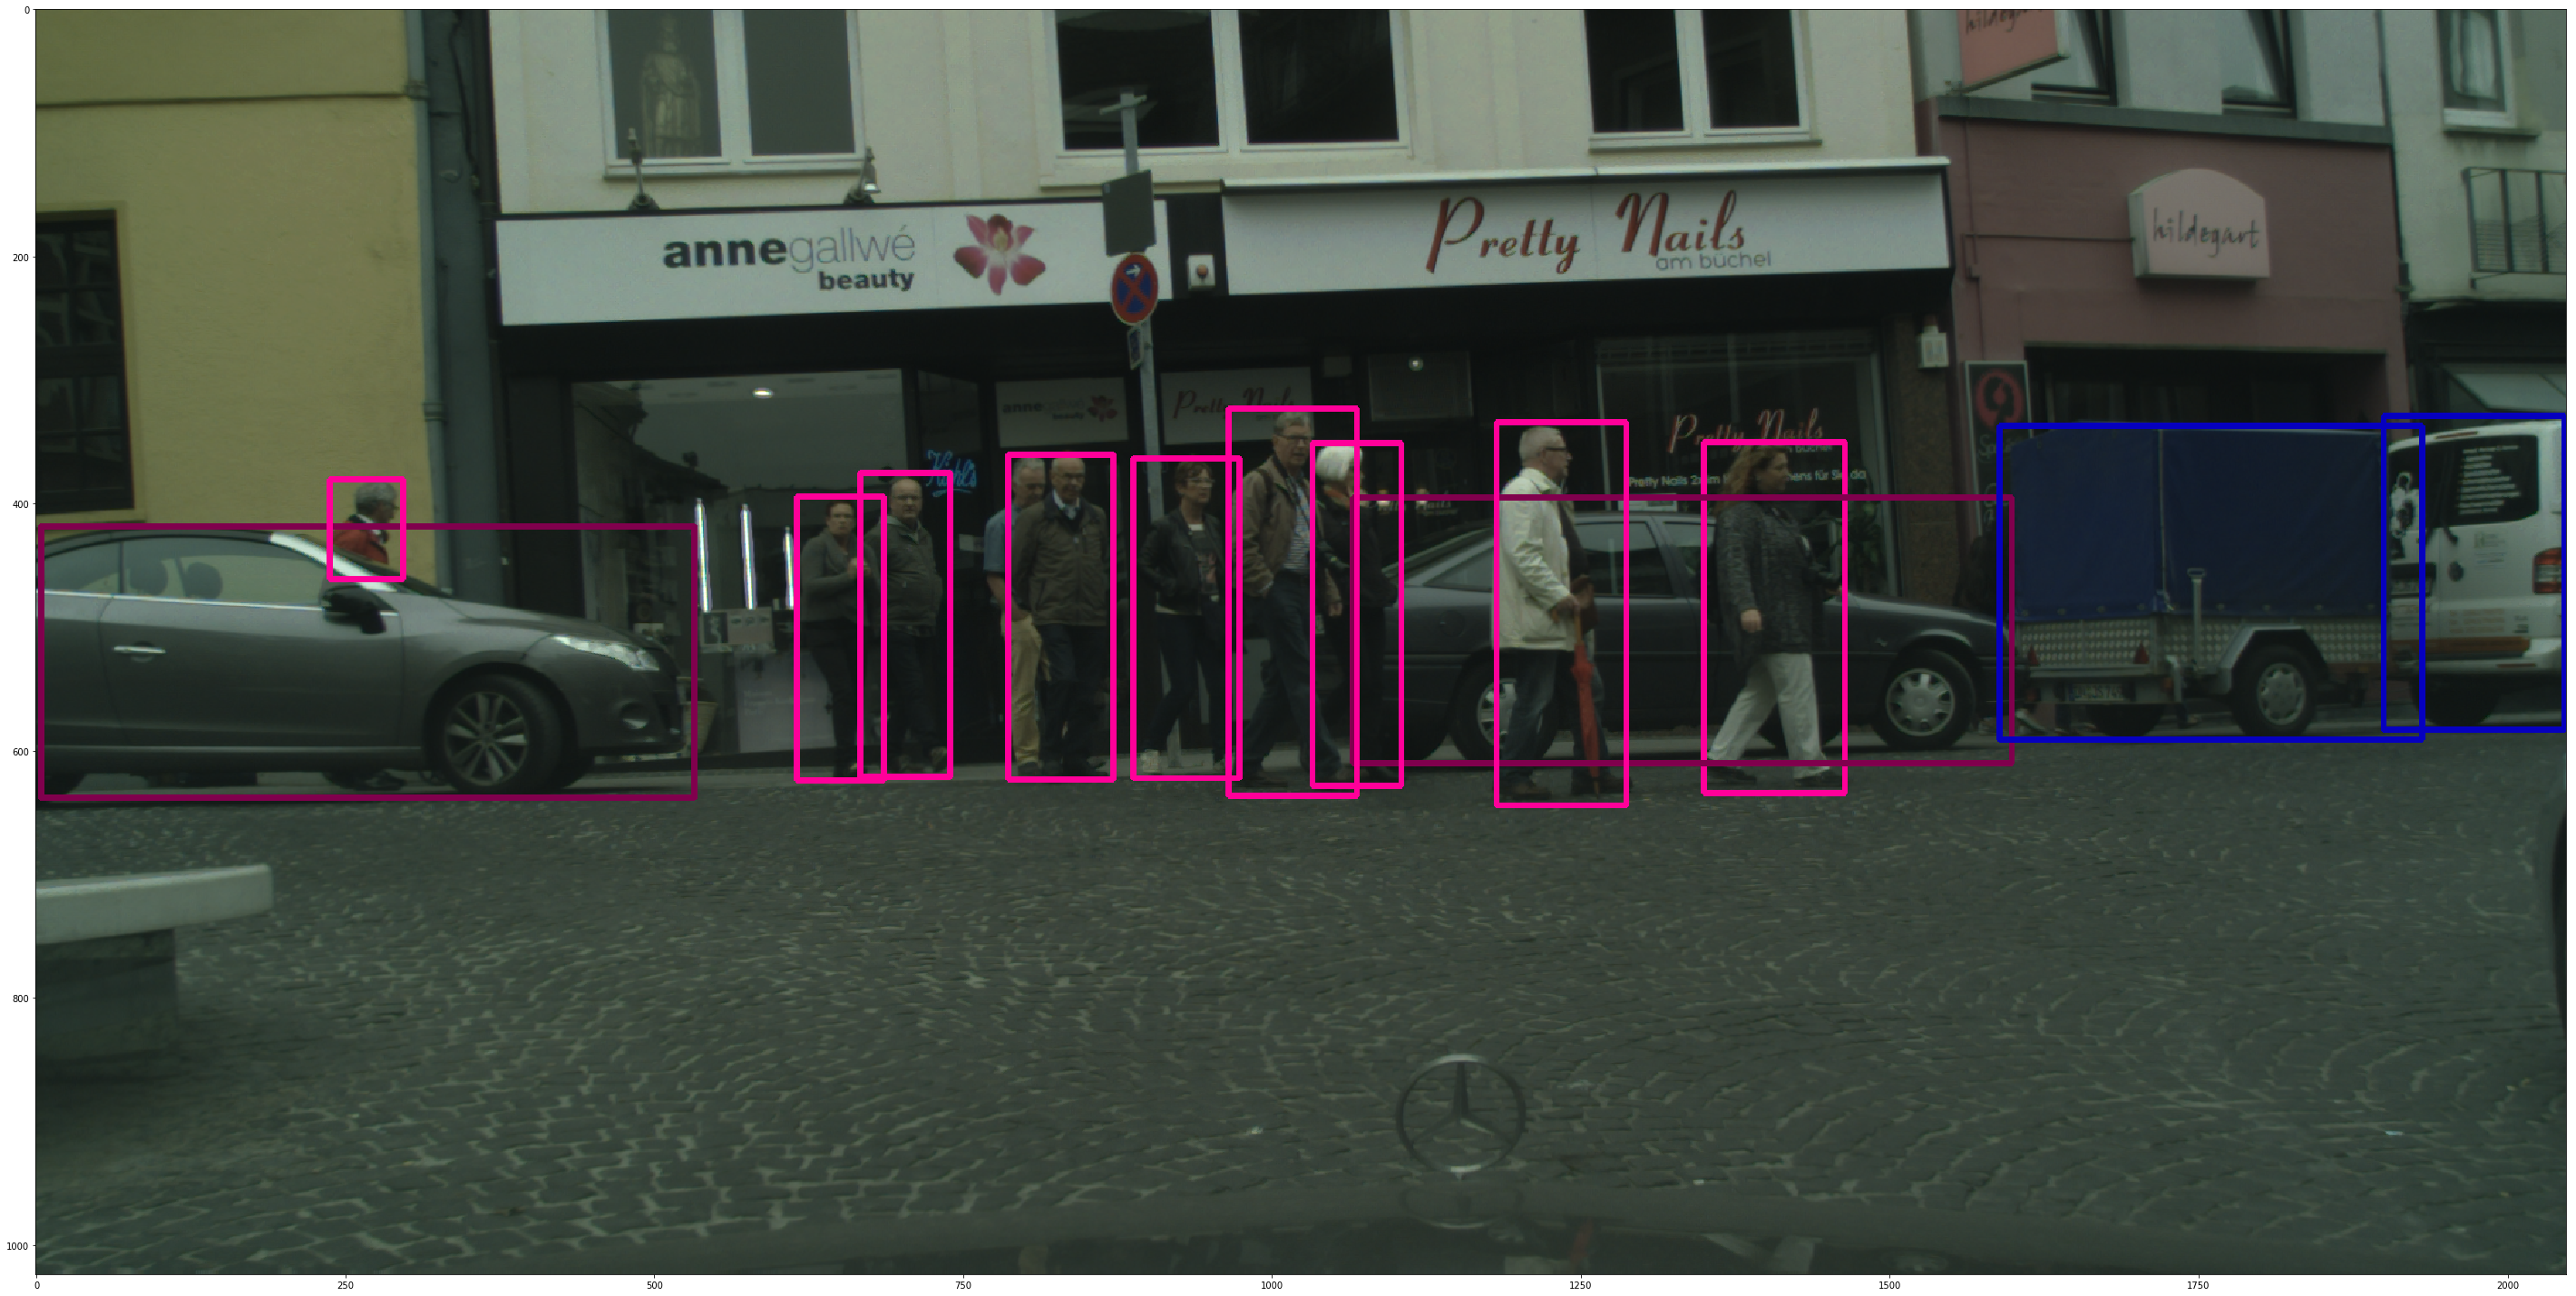

In [8]:
for img_fp in imgs_list:
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = applier.inference(image)
    for obj in mask["objects"]:
        obj.draw_contour(image, color_mapping[obj.class_title], 3)
    plt.figure(figsize=(50, 50))
    plt.imshow(image)
    plt.show()